<a href="https://colab.research.google.com/github/yanaa11/media-opinion-analyzer/blob/main/estimate_doc2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import re
import random
import time

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_to_train = "/content/drive/MyDrive/doc2vec/vectors/vectorized_train_d2v.csv"
path_to_test = "/content/drive/MyDrive/doc2vec/vectors/vectorized_test_d2v.csv"

# Upload data and model

In [5]:
train_df = pd.read_csv(path_to_train)
test_df = pd.read_csv(path_to_test)

In [6]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [7]:
!pip install testfixtures

     |████████████████████████████████| 102kB 5.2MB/s ta 0:00:011


In [8]:
model_dm = Doc2Vec.load('/content/drive/MyDrive/doc2vec/models/cdm_model.d2v')
model_dbow = Doc2Vec.load('/content/drive/MyDrive/doc2vec/models/dbow_model.d2v')

from gensim.test.test_doc2vec import ConcatenatedDoc2Vec

model_dbow.delete_temporary_training_data(
    keep_doctags_vectors=True,
    keep_inference=True)

model_dm.delete_temporary_training_data(
    keep_doctags_vectors=True,
    keep_inference=True)

new_model = ConcatenatedDoc2Vec([model_dbow, model_dm])

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import strip_tags       # strip html tags
from gensim.parsing.preprocessing import strip_short      
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_punctuation, strip_non_alphanum

CUSTOM_FILTERS = [lambda x: x.lower(), strip_non_alphanum, strip_punctuation, strip_short, 
                  strip_tags, remove_stopwords]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
train_df['body_tokenized'] = [preprocess_string(train_df['body'][i], CUSTOM_FILTERS) for i in range(len(train_df))]
test_df['body_tokenized'] = [preprocess_string(test_df['body'][i], CUSTOM_FILTERS) for i in range(len(test_df))]

In [11]:
train_df["vec"] = train_df["body_tokenized"].apply(new_model.infer_vector)
test_df["vec"] = test_df["body_tokenized"].apply(new_model.infer_vector)

# Classifier

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import utils
from sklearn.metrics import classification_report

In [13]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_df['vec'].to_list(), train_df['who'].to_list())
y_pred = logreg.predict(test_df['vec'].to_list())
print(classification_report(test_df['who'].to_list(), y_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77     10000
           1       0.81      0.67      0.73     10000

    accuracy                           0.75     20000
   macro avg       0.76      0.75      0.75     20000
weighted avg       0.76      0.75      0.75     20000



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Test "Trump" comment 



In [14]:
comment = "This is why we need Trump to win. With the USA as trendsetter, we can purge the traitors from office!"

In [15]:
comment_tokenized = preprocess_string(comment, CUSTOM_FILTERS)

In [18]:
trump_ref = [
'Bitcoin will soon be called Trump Coin it’ll be so great!',
'Daddy Trump is gonna make Daycare Great Again!',
'they was hoping trump would give them a boost in california. the tears are delicious',
'Flawless Centipede... Submit to @Twinksfortrump and follow @Gay4Trump',
'But if Bernie debates trump and a meteorite hit Hillary then sanders will win! Remember guys phone bank, donate, match me',
'edited because i was a tool, and edited to say LostTrumpSupporter is AWESOME!',
'my best tips are almost always from trump supporters. i guess when youre employed you can afford to be a generous person',
'And it will work, until Trump makes America so fucking awesome nobody would want to change it.',
'Poseidon is doing his best to protect the West.  Thank you based Poseidon.',
'Trump/Poseidon 2016',
'Probably made a script to respond to all of Trump’s newest tweets with pre-written tweets. He’s an impressive centipede!',
'Donald Trump is best',
'Trump has a diet for this country and trust me it’s gonna be nutritious and delicious',
'Mr. Trump all we do is win i need a break!',
'Babes are awesome so are Trump fellas.',
'That’s a cuck way of looking at it, Trump WILL WIN 50+DC!',
'Trump Tower has the best taco bowls.',
"immigrants are bad",
"Immigrants will take American jobs, lower our wages, and especially hurt the poor",
"Immigrants abuse the welfare state",
"Immigrants increase the budget deficit and government debt",
"Immigrants increase economic inequality",
"Today’s immigrants don’t assimilate like immigrants from previous waves did",
"Immigrants are a major source of crime",
"Immigrants pose a unique risk today because of terrorism",
"It’s easy to immigrate to America and we’re the most open country in the world",
"Amnesty or a failure to enforce our immigration laws will destroy the Rule of Law in the United States",
"By not exercising control over borders through actively blocking immigrants, the users of this argument warn, the United States government will surrender a vital component of its national sovereignty",
"Immigrants won’t vote for the Republican Party",
"Immigrants bring with them their bad cultures, ideas, or other factors that will undermine and destroy our economic and political institutions.  The resultant weakening in economic growth means that immigrants will destroy more wealth than they will create over the long run",
"The brain drain of smart immigrants to the United State impoverished other countries",
"Immigrants will increase crowding, harm the environment",
'Hey man im in north jersey as well. I wear my MAGA gear with pride and drive around with my trump bumper sticker. Im in morris county. Dont let the libs win. Trump 2016!!!',
'I’m not asking for a VP that is lockstep with Trump. But accepting a VP who was a prime mover in the passage of one of the greatest frauds foisted upon the US ever is NOT acceptable as VP. VP is a heartbeat from POTUS',
'The official Donald Trump MAGA cap is the one the Don himself wears. It’s the one I bought, and let me tell you folks, it is the best hat around, the best, believe me.'
]

trump_ref_tokenized = [preprocess_string(text, CUSTOM_FILTERS) for text in trump_ref]

In [21]:
comment_vec = new_model.infer_vector(comment_tokenized)

In [22]:
trump_ref_df = pd.DataFrame(trump_ref)

In [23]:
trump_ref_df['body_tokenized'] = trump_ref_tokenized

In [24]:
trump_ref_df['vec'] = trump_ref_df["body_tokenized"].apply(new_model.infer_vector)

In [27]:
from scipy import spatial

In [34]:
trump_scores = list()
for vec in list(train_df[train_df['who'] == 0]['vec']):
    trump_scores.append(1 - spatial.distance.cosine(vec, comment_vec))

biden_scores = list()
for vec in list(train_df[train_df['who'] == 1]['vec']):
    biden_scores.append(1 - spatial.distance.cosine(vec, comment_vec))

train_df['sim'] = (trump_scores + biden_scores)

ref_scores = list()
for vec in list(trump_ref_df['vec']):
    ref_scores.append(1 - spatial.distance.cosine(vec, comment_vec))
trump_ref_df['sim'] = ref_scores

In [35]:
print('Trump: mean', train_df[train_df['who'] == 0]['sim'].mean(), ' max', train_df[train_df['who'] == 0]['sim'].max())
print('Biden: mean', train_df[train_df['who'] == 1]['sim'].mean(), ' max', train_df[train_df['who'] == 1]['sim'].max())
print('Trump ref: mean',trump_ref_df['sim'].mean(), ' max', trump_ref_df['sim'].max())

Trump: mean 0.10735373092884787  max 0.5444661974906921
Biden: mean 0.09398472771048128  max 0.4660947322845459
Trump ref: mean 0.1483492644769805  max 0.25604456663131714


In [36]:
import matplotlib.pyplot as plt

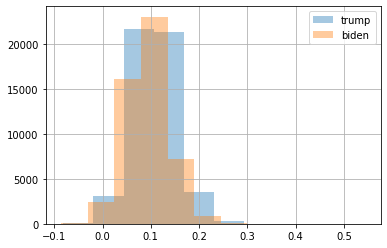

In [44]:
train_df[train_df['who'] == 0]['sim'].hist(alpha=0.4, label='trump')
train_df[train_df['who'] == 1]['sim'].hist(alpha=0.4, label='biden')
#trump_ref_df['sim'].hist(label='trump ref')
plt.legend()
plt.show()

In [45]:
other_comment = 'I like cats, bananas and math'
oth_comment_tokenized = preprocess_string(other_comment, CUSTOM_FILTERS)
oth_comment_vec = new_model.infer_vector(oth_comment_tokenized)

In [48]:
trump_scores = list()
for vec in list(train_df[train_df['who'] == 0]['vec']):
    trump_scores.append(1 - spatial.distance.cosine(vec, oth_comment_vec))

biden_scores = list()
for vec in list(train_df[train_df['who'] == 1]['vec']):
    biden_scores.append(1 - spatial.distance.cosine(vec, oth_comment_vec))

train_df['sim_other'] = (trump_scores + biden_scores)

ref_scores = list()
for vec in list(trump_ref_df['vec']):
    ref_scores.append(1 - spatial.distance.cosine(vec, oth_comment_vec))
trump_ref_df['sim_other'] = ref_scores

In [49]:
print('Trump: mean', train_df[train_df['who'] == 0]['sim_other'].mean(), ' max', train_df[train_df['who'] == 0]['sim_other'].max())
print('Biden: mean', train_df[train_df['who'] == 1]['sim_other'].mean(), ' max', train_df[train_df['who'] == 1]['sim_other'].max())
print('Trump ref: mean',trump_ref_df['sim_other'].mean(), ' max', trump_ref_df['sim_other'].max())

Trump: mean 0.25118100968637036  max 0.6788507103919983
Biden: mean 0.22616902054043253  max 0.5393192768096924
Trump ref: mean 0.1796420562214085  max 0.31827282905578613


In [51]:
train_df.sort_values('sim', ascending=False).head(10)

,Unnamed: 0,body,who,body_tokenized,vec,sim,sim_other
25038,25038,When is putin out of office? he is been there ...,0,"[putin, office, forever]","[0.022405343, 0.009816966, -0.0058599617, 0.01...",0.544466,0.193144
35533,35533,march in front of his office and force him to ...,0,"[march, office, force, resign]","[0.05697422, -0.013187539, -0.052570507, 0.008...",0.494978,0.201657
77611,77611,What date does Drumpf actually leave office wh...,1,"[date, drumpf, actually, leave, office, voted,...","[0.09923144, -0.08139988, 0.06165655, 0.044195...",0.466095,0.145121
89079,89079,Really good take I am going to. Trump has so ...,1,"[good, going, trump, cash, need, help, current...","[-0.06909616, 0.004821793, 0.07490069, 0.04091...",0.462939,0.152816
81484,81484,Someone Internet Archive this video for when t...,1,"[internet, archive, video, kid, runs, office, ...","[0.06070672, 0.009888675, -0.0059358953, 0.055...",0.432547,0.164327
11171,11171,We are outraged you are still in office and no...,0,"[outraged, office, prison]","[0.09907567, -0.030700803, -0.041531328, 0.023...",0.430796,0.251315
25611,25611,"As soon as Trump is out of office, my account ...",0,"[soon, trump, office, account, deleted, reddit...","[-0.044207796, -0.12110069, -0.01566878, 0.069...",0.426849,0.214140
1995,1995,Trumpy Trump should be put in office! His whol...,0,"[trumpy, trump, office, family, office]","[0.024604611, -0.017690975, 0.06285293, 0.0277...",0.423586,0.227024
10234,10234,that is how office gossip starts and office “c...,0,"[office, gossip, starts, office, cliques, work...","[0.088229276, 0.00035618828, 0.01520726, 0.130...",0.411898,0.246703
54933,54933,If you did not register absentee there is 2 we...,1,"[register, absentee, weeks, early, voting, ele...","[0.07569203, -0.026395457, 0.0369873, 0.001501...",0.409652,0.184163


# Visualization

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

def plot_2d_representation_of_words(
    data, 
    embedding="embedding",
    label = "label",
    alpha=0.4, 
    alg = "TSNE"
):
    if alg == "PCA":
      dim_red = PCA(n_components = 2)
    elif alg == "TSNE":
      dim_red = TSNE(n_components = 2)
    
    sentence_vectors = list(data[embedding])
    sentence_plus_coordinates = pd.DataFrame(sentence_vectors)
    
    labels = data[label].reset_index(drop=True)
    
    coordinates_2d = dim_red.fit_transform(sentence_plus_coordinates)
    coordinates_2d = pd.DataFrame(coordinates_2d, columns=['x', 'y'])
    coordinates_2d = pd.concat([coordinates_2d, labels], axis=1)
            
    plt.figure(figsize = (15,10))
    p1=sns.scatterplot(data=coordinates_2d, x='x', y='y', hue=label, alpha=alpha)
    
    x = coordinates_2d['x']
    y = coordinates_2d['y']
    
    plt.show()

t-SNE

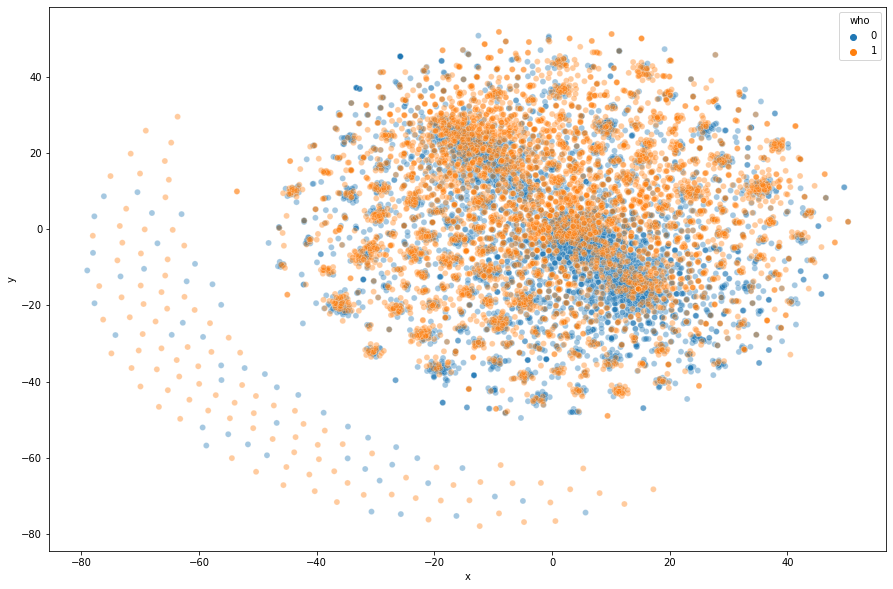

In [ ]:
plot_2d_representation_of_words(data=test_df[5000:-5000], embedding='vec', label='who')

PCA

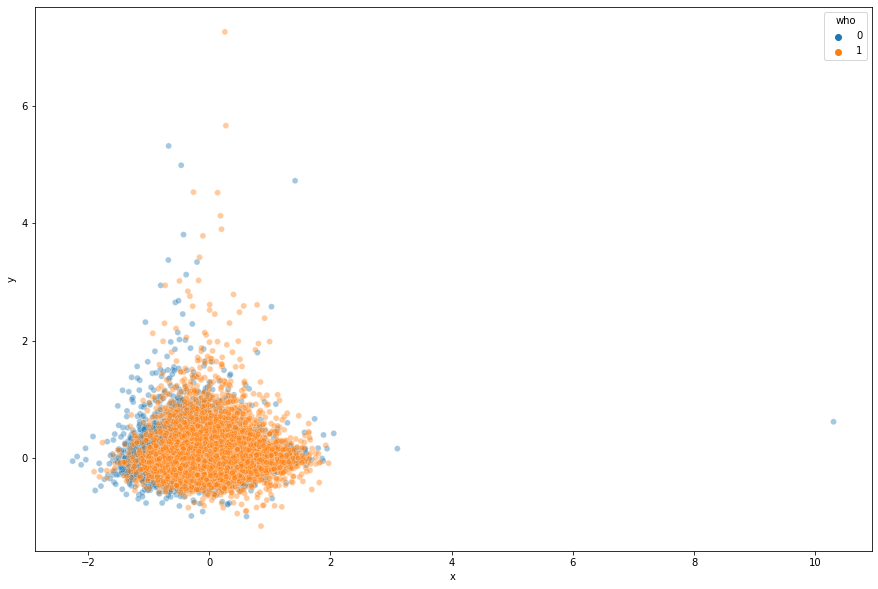

In [ ]:
plot_2d_representation_of_words(data=test_df, embedding='vec', label='who', alg="PCA")

# Clustering

### Cosine similarity

In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 1.8MB 8.3MB/s 
     |████████████████████████████████| 1.2MB 36.0MB/s 
     |████████████████████████████████| 2.9MB 44.5MB/s 
     |████████████████████████████████| 890kB 53.7MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp36-none-any.whl size=103068 sha256=66ee117ac65dae3918291d6c5e6fce577bea72b1ba4f2514040fcfda5ed43393
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=1e28b9cef95d1d6a23977ee596aacae42c3be01e5e34c83b6e38d04a189e9bc6
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer, util

In [ ]:
def community_detection(embeddings, threshold=0.75, min_community_size=10, init_max_size=1000):
    """
    Function for Fast Community Detection
    Finds in the embeddings all communities, i.e. embeddings that are close (closer than threshold).
    Returns only communities that are larger than min_community_size. The communities are returned
    in decreasing order. The first element in each list is the central point in the community.
    """

    # Compute cosine similarity scores
    cos_scores = util.pytorch_cos_sim(embeddings, embeddings)

    # Minimum size for a community
    top_k_values, _ = cos_scores.topk(k=min_community_size, largest=True)

    # Filter for rows >= min_threshold
    extracted_communities = []
    for i in range(len(top_k_values)):
        if top_k_values[i][-1] >= threshold:
            new_cluster = []

            # Only check top k most similar entries
            top_val_large, top_idx_large = cos_scores[i].topk(k=init_max_size, largest=True)
            top_idx_large = top_idx_large.tolist()
            top_val_large = top_val_large.tolist()

            if top_val_large[-1] < threshold:
                for idx, val in zip(top_idx_large, top_val_large):
                    if val < threshold:
                        break

                    new_cluster.append(idx)
            else:
                # Iterate over all entries (slow)
                for idx, val in enumerate(cos_scores[i].tolist()):
                    if val >= threshold:
                        new_cluster.append(idx)

            extracted_communities.append(new_cluster)

    # Largest cluster first
    extracted_communities = sorted(extracted_communities, key=lambda x: len(x), reverse=True)

    # Step 2) Remove overlapping communities
    unique_communities = []
    extracted_ids = set()

    for community in extracted_communities:
        add_cluster = True
        for idx in community:
            if idx in extracted_ids:
                add_cluster = False
                break

        if add_cluster:
            unique_communities.append(community)
            for idx in community:
                extracted_ids.add(idx)

    return unique_communities

In [ ]:
print("Start clustering")
start_time = time.time()

#Two parameter to tune:
#min_cluster_size: Only consider cluster that have at least 25 elements (30 similar sentences)
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = community_detection(test_df['vec'].to_list(), min_community_size=20, threshold=0.6)

print('Кол-во кластеров:', len(clusters))
for cluster in range(len(clusters)):
    print(f'Кол-во элементов в кластере {cluster}:', len(clusters[cluster]))

#Print all cluster / communities
'''
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster:
        print("\t", corpus_sentences[sentence_id])
'''

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

Start clustering
Кол-во кластеров: 6
Кол-во элементов в кластере 0: 1504
Кол-во элементов в кластере 1: 29
Кол-во элементов в кластере 2: 28
Кол-во элементов в кластере 3: 25
Кол-во элементов в кластере 4: 24
Кол-во элементов в кластере 5: 22
Clustering done after 15.71 sec


In [ ]:
test_df["cosine_cluster"] = None

for i, cluster in enumerate(clusters):
    for row in cluster:
        test_df["cosine_cluster"][int(row)] = i

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


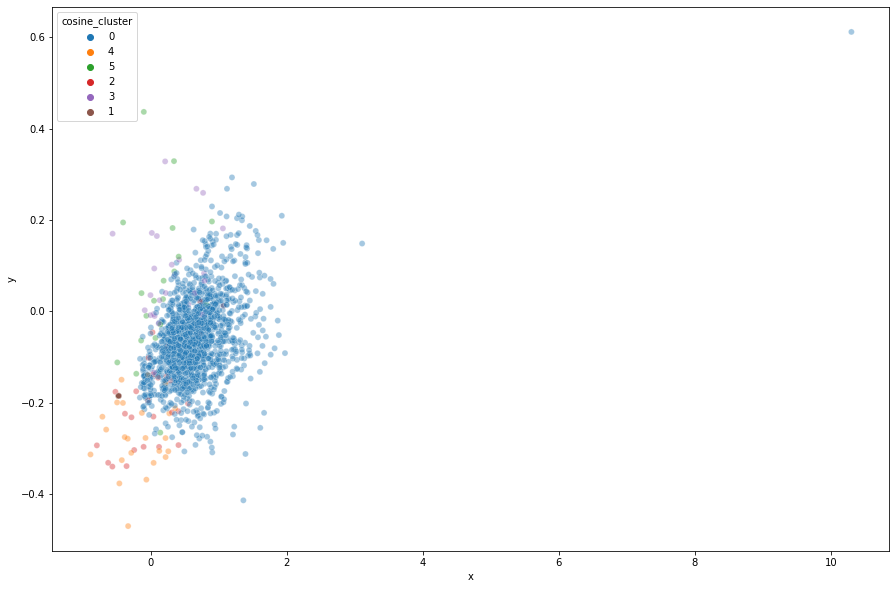

In [ ]:
plot_2d_representation_of_words(data=test_df, embedding='vec', label='cosine_cluster', alg="PCA")

### DBSCAN

Сначала сожму размерность до 50 измерений. 

In [ ]:
dim_red = TSNE(n_components = 50, method="exact", n_iter=250)

sentence_plus_coordinates = pd.DataFrame(list(test_df['vec']))
labels = test_df['who'].reset_index(drop=True)

coordinates_50d = dim_red.fit_transform(sentence_plus_coordinates)
coordinates_50d = pd.concat([coordinates_50d, labels], axis=1)